In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the data
df = pd.read_csv('Rose.csv',parse_dates=True, index_col='YearMonth')
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


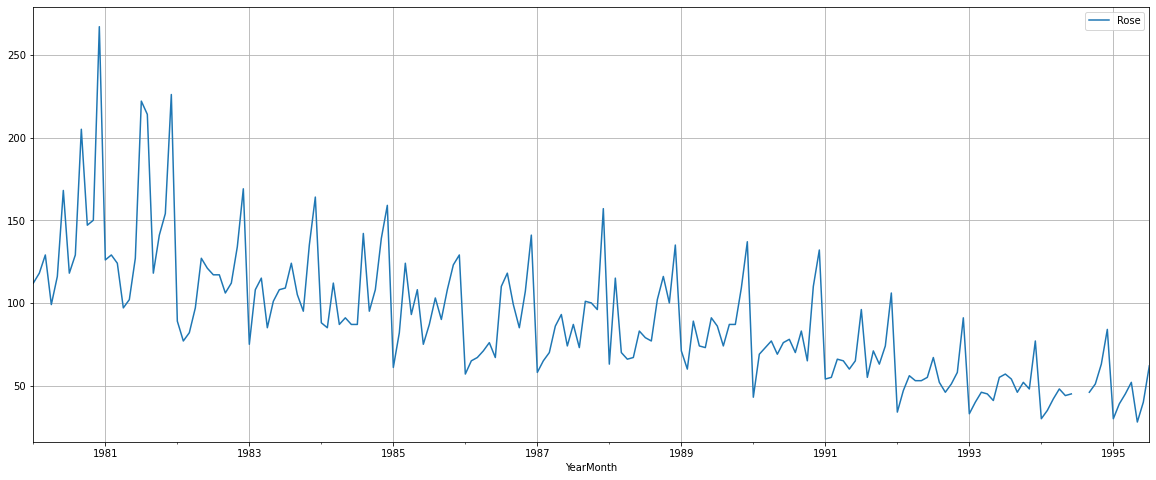

In [4]:
# Plot the time series
df.plot(figsize=(20,8))
plt.grid()

In [5]:
# Descriptive Stats
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [6]:
df.isnull().sum()

Rose    2
dtype: int64

In [7]:
df.isna().sum()

Rose    2
dtype: int64

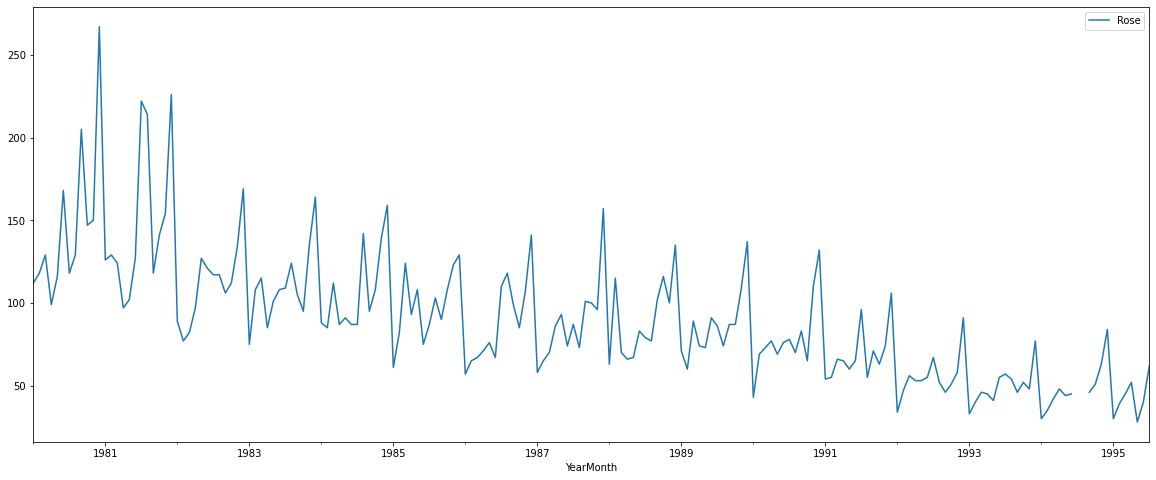

In [8]:
from     datetime                 import datetime

def parser(x): return datetime.strptime(x, '%Y-%m')

series              =  pd.read_csv('Rose.csv', header = 0, index_col = 0, parse_dates = True,
                                              squeeze = True, date_parser = parser)
df                    = pd.DataFrame(series)

df.plot(figsize=(20,8))
plt.show()

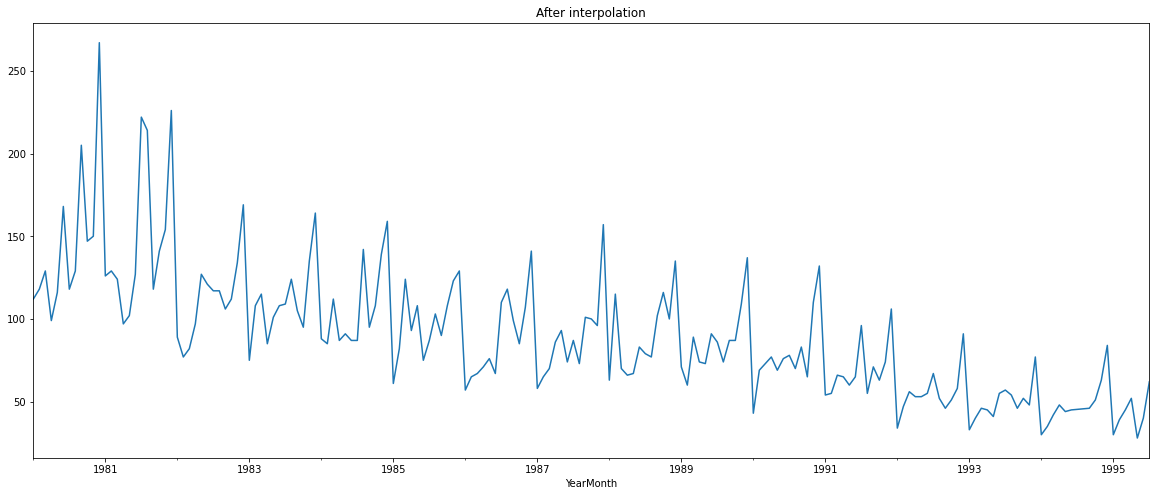

In [9]:
series.converted  = df['Rose']
ts                             = series.converted.resample('MS').mean() #the syntax has changed due to the updated version
#of the packages

df_imp   = ts.interpolate(method = 'linear')
df_imp.plot(figsize=(20,8))
plt.title('After interpolation')
plt.show()


In [10]:
df=df_imp.to_frame()

In [11]:
df.isnull().sum()

Rose    0
dtype: int64

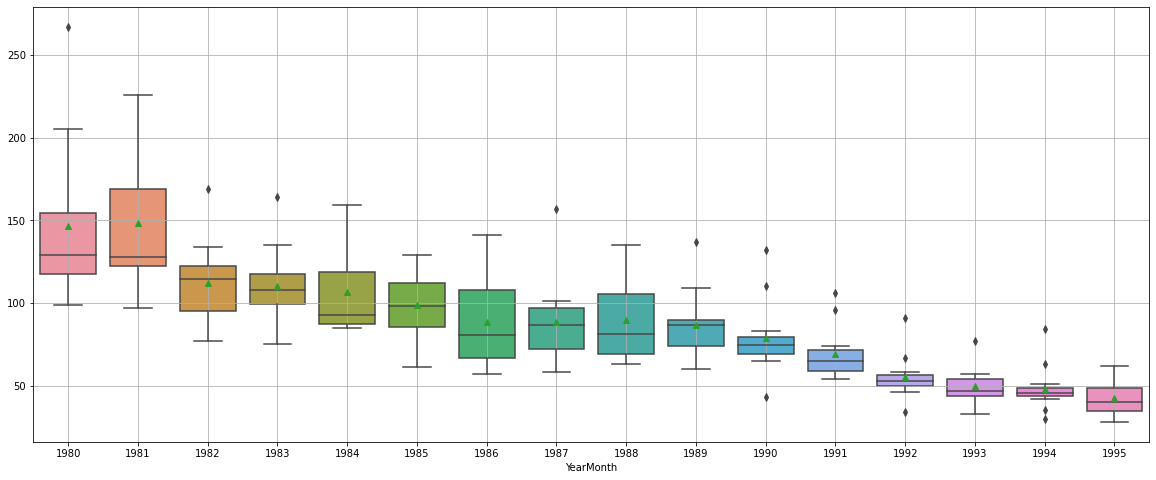

In [12]:
# Spread over different years
plt.figure(figsize=(20,8))
sns.boxplot(x=df.index.year,y=df.values[:,0], showmeans=True)
plt.grid()

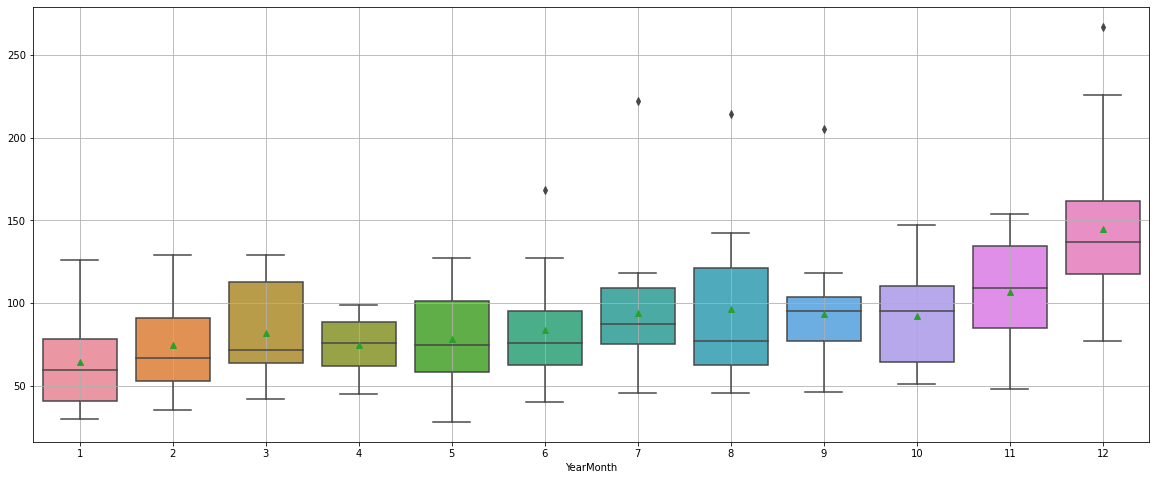

In [13]:
# Spread for months
plt.figure(figsize=(20,8))
sns.boxplot(x=df.index.month, y=df.values[:,0],showmeans=True)
plt.grid()

In [14]:
from statsmodels.graphics.tsaplots import month_plot

<Figure size 1440x576 with 0 Axes>

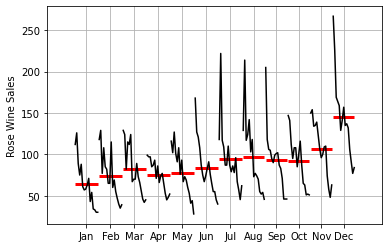

In [15]:
plt.figure(figsize=(20,8))
month_plot(df['Rose'],ylabel='Rose Wine Sales')
plt.grid();

In [16]:
# Monthly sales line graph
df_month = pd.pivot_table(df,values='Rose',columns=df.index.month, index=df.index.year)
df_month

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


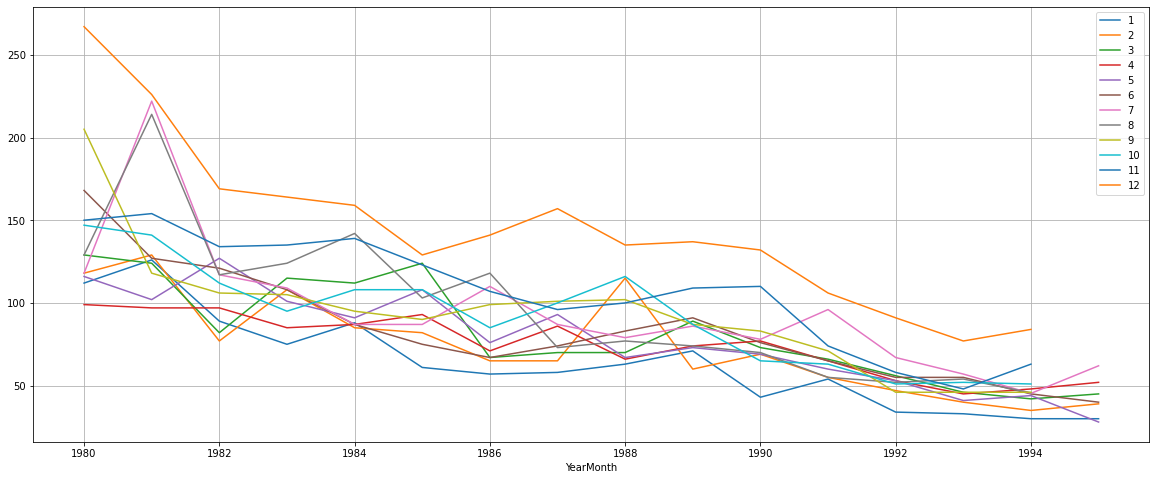

In [17]:
df_month.plot(figsize=(20,8))
plt.grid()
plt.legend(loc='best')

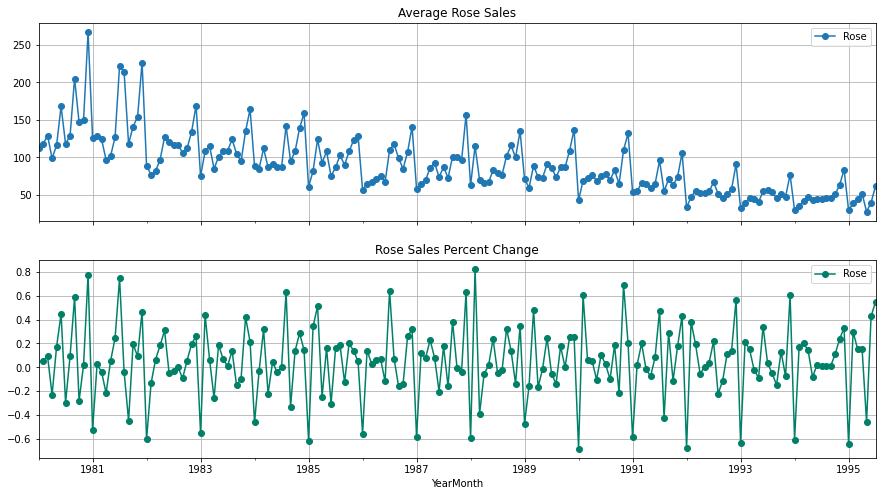

In [18]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Sales Percent Change",grid=True)

In [19]:
# Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

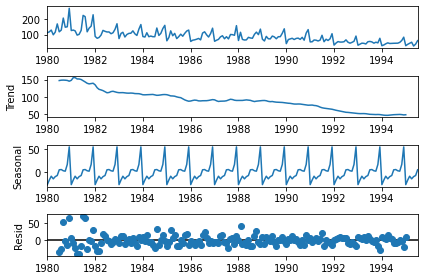

In [20]:
decomposition_add = seasonal_decompose(df,model='Multiplicative')
decomposition_add.plot();

In [21]:
trend_add = decomposition_add.trend
seasonality_add = decomposition_add.seasonal
residual_add = decomposition_add.resid

print('Trends',trend_add.head(12))
print('')
print('Seasonal',seasonality_add.head(12))
print('')
print('Residual',residual_add.head(12))

Trends YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Freq: MS, Name: trend, dtype: float64

Seasonal YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Freq: MS, Name: seasonal, dtype: float64

Residual YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01  

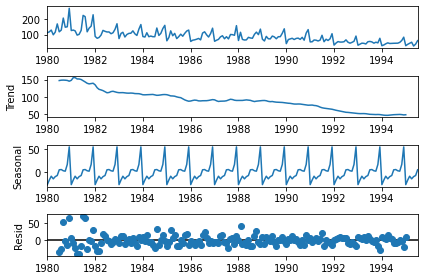

In [22]:
decomposition_mul = seasonal_decompose(df,model='Multiplicative')
decomposition_mul.plot();

In [23]:
trend_mul = decomposition_mul.trend
seasonality_mul = decomposition_mul.seasonal
residual_mul = decomposition_mul.resid

print('Trends',trend_mul.head(12))
print('')
print('Seasonal',seasonality_mul.head(12))
print('')
print('Residual',residual_mul.head(12))

Trends YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Freq: MS, Name: trend, dtype: float64

Seasonal YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Freq: MS, Name: seasonal, dtype: float64

Residual YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01  

In [24]:
# Split the data into train and test
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [25]:
# Display Data samples
from IPython.display import display
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


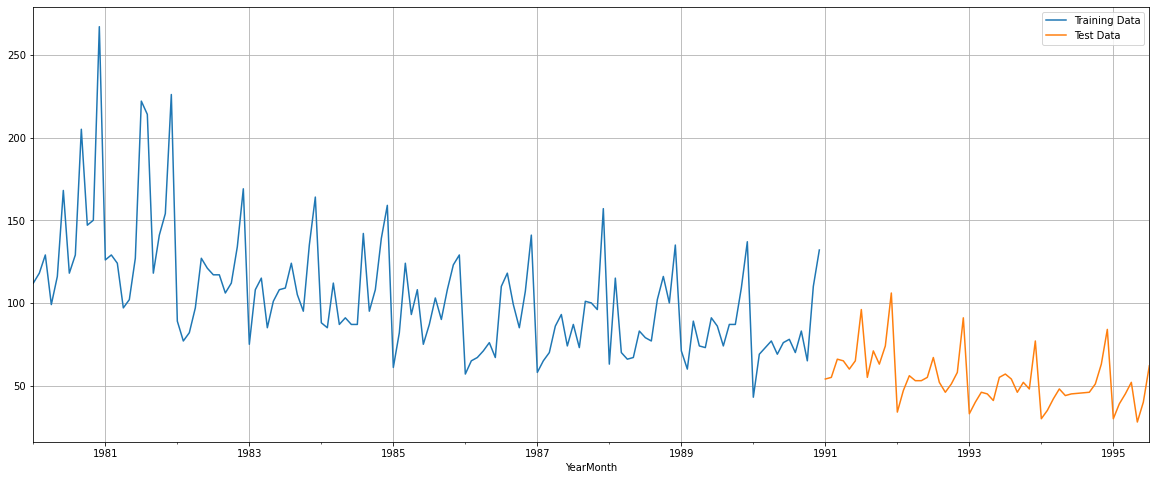

In [26]:
# Plot Train test graph
train['Rose'].plot(figsize=(20,8))
test['Rose'].plot(figsize=(20,8))
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [27]:
# Building different models and accuracy comparison 

In [28]:
# Model 1:Linear Regression
train_time = [i+1 for i in range(len(train))]
test_time = [i+1 for i in range(len(test))]
print(train_time)
print(test_time)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]


In [29]:
LR_train = train.copy()
LR_test = test.copy()

In [30]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [31]:
print(LR_train.head())
print(LR_test.head())

             Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5
            Rose  time
YearMonth             
1991-01-01  54.0     1
1991-02-01  55.0     2
1991-03-01  66.0     3
1991-04-01  65.0     4
1991-05-01  60.0     5


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
LR_model = LinearRegression()

In [34]:
LR_model.fit(LR_train[['time']],LR_train['Rose'].values)

LinearRegression()

In [35]:
LR_pred_test = LR_model.predict(LR_test[['time']])
LR_test['RegOnTime'] = LR_pred_test

In [36]:
LR_test.head()

,Rose,time,RegOnTime
YearMonth,,,
1991-01-01,54.0,1,137.321144
1991-02-01,55.0,2,136.826766
1991-03-01,66.0,3,136.332388
1991-04-01,65.0,4,135.838010
1991-05-01,60.0,5,135.343632


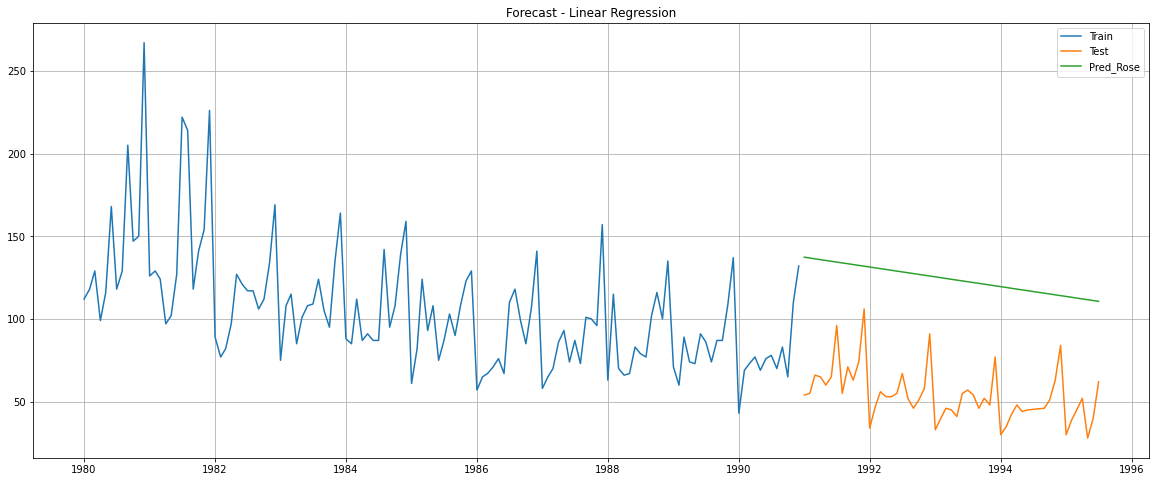

In [37]:
plt.figure(figsize=(20,8))
plt.plot(train['Rose'],label='Train')
plt.plot(test['Rose'],label='Test')
plt.plot(LR_test['RegOnTime'],label='Pred_Rose')
plt.legend(loc='best')
plt.title('Forecast - Linear Regression')
plt.grid();

In [38]:
# Model evaluation
from sklearn import metrics

In [39]:
rmse_LR_test = metrics.mean_squared_error(test['Rose'],LR_pred_test,squared=False)
print('For Linear Regression Forecast on the Test Data, RSME is {:1.2f}'.format(rmse_LR_test))

For Linear Regression Forecast on the Test Data, RSME is 71.60


In [40]:
result_df = pd.DataFrame({'Test RMSE': [rmse_LR_test]},index=['LR_Model'])
result_df

,Test RMSE
LR_Model,71.596828


In [41]:
# Model 2: Naive Approach
NA_train = train.copy()
NA_test = test.copy()

In [42]:
NA_test['Naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NA_test['Naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Freq: MS, Name: Naive, dtype: float64

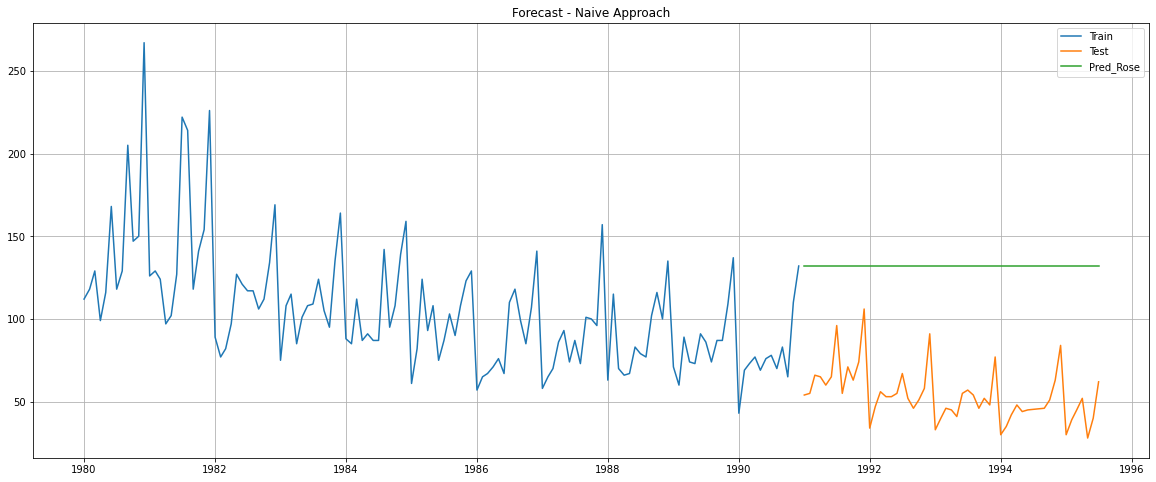

In [43]:
plt.figure(figsize=(20,8))
plt.plot(train['Rose'],label='Train')
plt.plot(test['Rose'],label='Test')
plt.plot(NA_test['Naive'],label='Pred_Rose')
plt.legend(loc='best')
plt.title('Forecast - Naive Approach')
plt.grid();

In [44]:
rmse_NA_test = metrics.mean_squared_error(test['Rose'],NA_test['Naive'],squared=False)
print('For Naive Approach Forecast on the Test Data, RSME is {:1.2f}'.format(rmse_NA_test))

For Naive Approach Forecast on the Test Data, RSME is 79.72


In [45]:
result_df_2 = pd.DataFrame({'Test RMSE': [rmse_NA_test]},index=['Naive_Model'])
result_df = pd.concat([result_df,result_df_2])
result_df

,Test RMSE
LR_Model,71.596828
Naive_Model,79.718773


In [46]:
# Model 3: Simple Average
SA_train = train.copy()
SA_test = test.copy()

In [47]:
SA_test['mean_forecast'] = test['Rose'].mean()
SA_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,53.854545
1991-02-01,55.0,53.854545
1991-03-01,66.0,53.854545
1991-04-01,65.0,53.854545
1991-05-01,60.0,53.854545


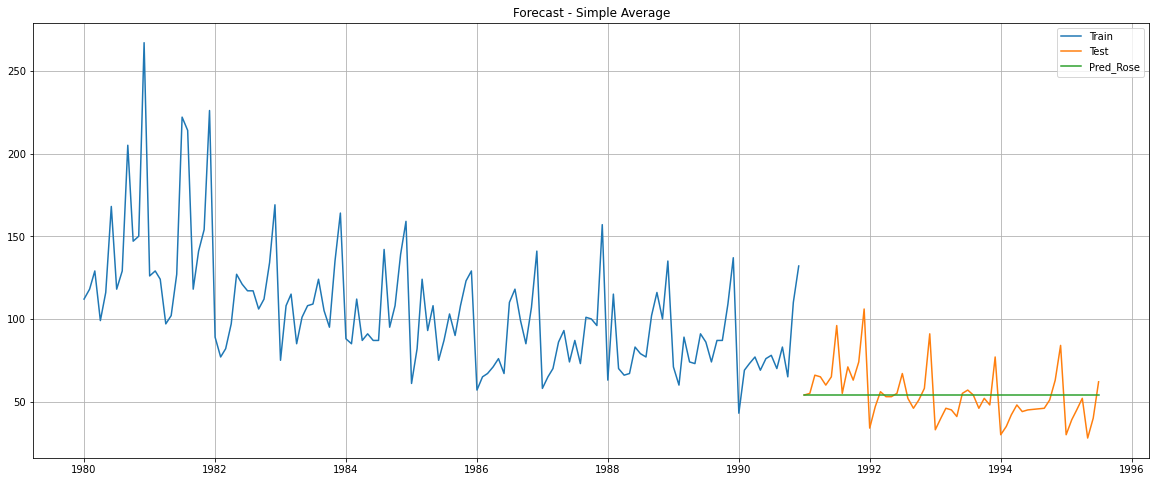

In [48]:
plt.figure(figsize=(20,8))
plt.plot(train['Rose'],label='Train')
plt.plot(test['Rose'],label='Test')
plt.plot(SA_test['mean_forecast'],label='Pred_Rose')
plt.legend(loc='best')
plt.title('Forecast - Simple Average')
plt.grid();

In [49]:
rmse_SA_test = metrics.mean_squared_error(test['Rose'],SA_test['mean_forecast'],squared=False)
print('For Simple Average Forecast on the Test Data, RSME is {:1.2f}'.format(rmse_NA_test))

For Simple Average Forecast on the Test Data, RSME is 79.72


In [50]:
result_df_3 = pd.DataFrame({'Test RMSE': [rmse_SA_test]},index=['Simple Average'])
result_df = pd.concat([result_df,result_df_3])
result_df

,Test RMSE
LR_Model,71.596828
Naive_Model,79.718773
Simple Average,15.759783


In [51]:
# Model 4: Moving Average
Moving_Average = df.copy()
Moving_Average.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [52]:
Moving_Average['Trailing_2'] = Moving_Average['Rose'].rolling(2).mean()
Moving_Average['Trailing_4'] = Moving_Average['Rose'].rolling(4).mean()
Moving_Average['Trailing_6'] = Moving_Average['Rose'].rolling(6).mean()
Moving_Average['Trailing_8'] = Moving_Average['Rose'].rolling(8).mean()

In [160]:
Moving_Average.head(10)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_8
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.50,NaN,NaN
1980-05-01,116.0,107.5,115.50,NaN,NaN
1980-06-01,168.0,142.0,128.00,123.666667,NaN
1980-07-01,118.0,143.0,125.25,124.666667,NaN
1980-08-01,129.0,123.5,132.75,126.500000,123.625
1980-09-01,205.0,167.0,155.00,139.166667,135.250


Text(0.5, 1.0, 'Different trailing MA')

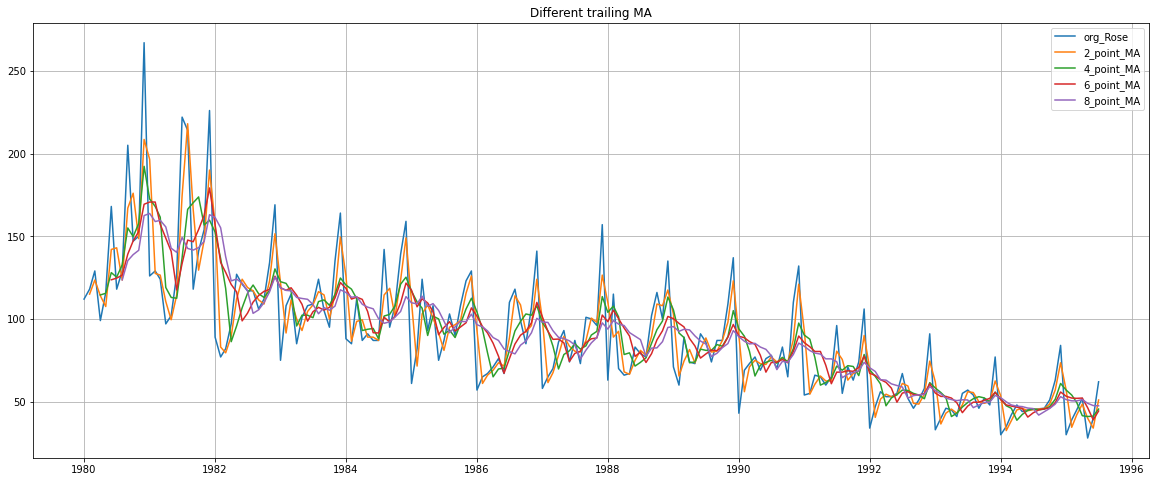

In [54]:
plt.figure(figsize=(20,8))
plt.plot(Moving_Average['Rose'],label='org_Rose')
plt.plot(Moving_Average['Trailing_2'],label='2_point_MA')
plt.plot(Moving_Average['Trailing_4'],label='4_point_MA')
plt.plot(Moving_Average['Trailing_6'],label='6_point_MA')
plt.plot(Moving_Average['Trailing_8'],label='8_point_MA')
plt.legend(loc='best')
plt.grid()
plt.title('Different trailing MA')

In [55]:
# Train-Test Dataset
MA_train = train.copy()
MA_test = test.copy()

In [56]:
# Plotting MA on train test
MA_train['Trailing_2'] = MA_train['Rose'].rolling(2).mean()
MA_train['Trailing_4'] = MA_train['Rose'].rolling(4).mean()
MA_train['Trailing_6'] = MA_train['Rose'].rolling(6).mean()
MA_train['Trailing_8'] = MA_train['Rose'].rolling(8).mean()

In [57]:
# Plotting MA on test test
MA_test['Trailing_2'] = MA_test['Rose'].rolling(2).mean()
MA_test['Trailing_4'] = MA_test['Rose'].rolling(4).mean()
MA_test['Trailing_6'] = MA_test['Rose'].rolling(6).mean()
MA_test['Trailing_8'] = MA_test['Rose'].rolling(8).mean()

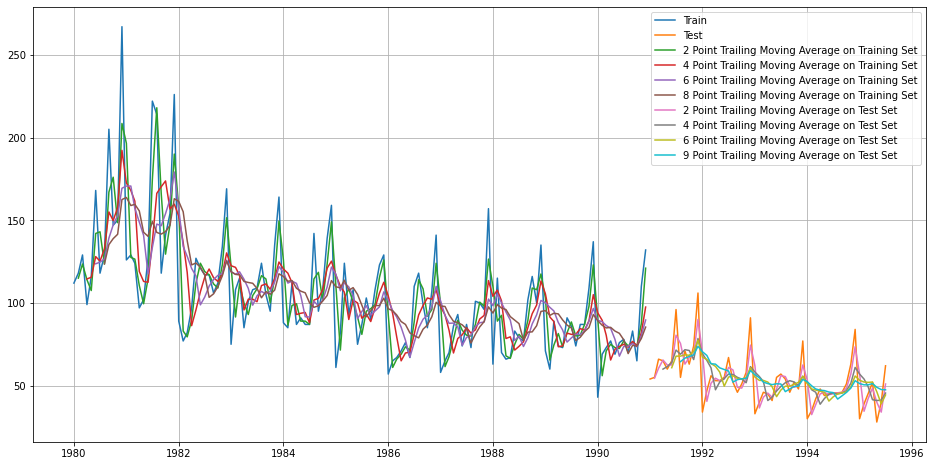

In [58]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MA_train['Rose'], label='Train')
plt.plot(MA_test['Rose'], label='Test')

plt.plot(MA_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(MA_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(MA_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(MA_train['Trailing_8'],label = '8 Point Trailing Moving Average on Training Set')

plt.plot(MA_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(MA_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(MA_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(MA_test['Trailing_8'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [59]:
rmse_2MA_test = metrics.mean_squared_error(test['Rose'].iloc[8:],MA_test['Trailing_2'].iloc[8:],squared=False)
print('For Moving Average Forecast(Trailing 2) on the Test Data, RSME is {:1.2f}'.format(rmse_2MA_test))

rmse_4MA_test = metrics.mean_squared_error(test['Rose'].iloc[8:],MA_test['Trailing_4'].iloc[8:],squared=False)
print('For Moving Average Forecast(Trailing 4) on the Test Data, RSME is {:1.2f}'.format(rmse_4MA_test))

rmse_6MA_test = metrics.mean_squared_error(test['Rose'].iloc[8:],MA_test['Trailing_6'].iloc[8:],squared=False)
print('For Moving Average Forecast(Trailing 6) on the Test Data, RSME is {:1.2f}'.format(rmse_6MA_test))

rmse_8MA_test = metrics.mean_squared_error(test['Rose'].iloc[8:],MA_test['Trailing_8'].iloc[8:],squared=False)
print('For Moving Average Forecast(Trailing 8) on the Test Data, RSME is {:1.2f}'.format(rmse_8MA_test))

For Moving Average Forecast(Trailing 2) on the Test Data, RSME is 10.40
For Moving Average Forecast(Trailing 4) on the Test Data, RSME is 13.18
For Moving Average Forecast(Trailing 6) on the Test Data, RSME is 13.30
For Moving Average Forecast(Trailing 8) on the Test Data, RSME is 14.00


In [60]:
result_df_4 = pd.DataFrame({'Test RMSE': [rmse_2MA_test,rmse_4MA_test
                                          ,rmse_6MA_test,rmse_8MA_test]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','8pointTrailingMovingAverage'])

result_df = pd.concat([result_df, result_df_4])
result_df

,Test RMSE
LR_Model,71.596828
Naive_Model,79.718773
Simple Average,15.759783
2pointTrailingMovingAverage,10.402622
4pointTrailingMovingAverage,13.176123
6pointTrailingMovingAverage,13.299874
8pointTrailingMovingAverage,13.997297


Text(0.5, 1.0, 'Model Comparison - LR, Naive, Simple Average and Trailing Moving Average')

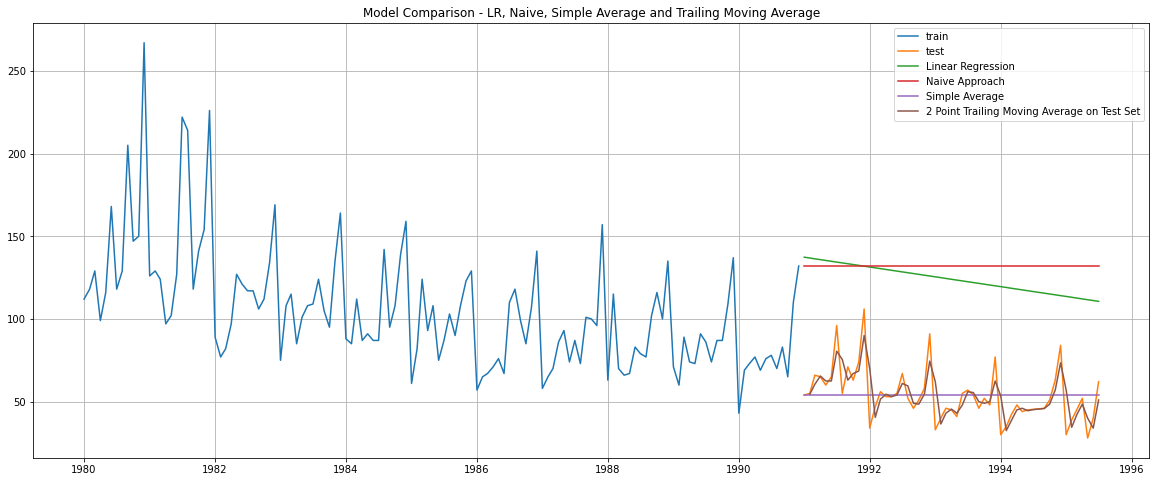

In [61]:
plt.figure(figsize=(20,8))
plt.plot(train['Rose'],label='train')
plt.plot(test['Rose'],label='test')

plt.plot(LR_test['RegOnTime'],label='Linear Regression')

plt.plot(NA_test['Naive'],label='Naive Approach')

plt.plot(SA_test['mean_forecast'],label='Simple Average')

plt.plot(MA_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Model Comparison - LR, Naive, Simple Average and Trailing Moving Average')

In [62]:
# Model 5: Simple Moving Average
from statsmodels.tsa.api import SimpleExpSmoothing

In [63]:
SES_train = train.copy()
SES_test = test.copy()

In [64]:
SES_model = SimpleExpSmoothing(SES_train['Rose'])

In [65]:
SES_model_autofit = SES_model.fit(optimized=True)

In [66]:
SES_model_autofit.params

{'smoothing_level': 0.09874989743650385,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38699692184085,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [67]:
SES_test['Predict'] =SES_model_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,Predict
YearMonth,,
1991-01-01,54.0,87.104999
1991-02-01,55.0,87.104999
1991-03-01,66.0,87.104999
1991-04-01,65.0,87.104999
1991-05-01,60.0,87.104999


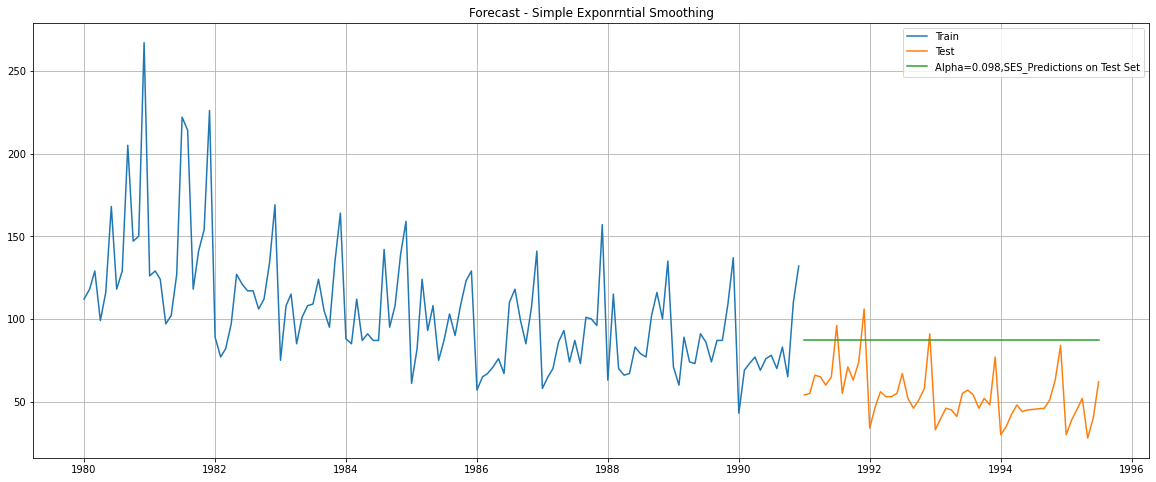

In [68]:
plt.figure(figsize=(20,8))
plt.plot(train['Rose'],label='Train')
plt.plot(test['Rose'],label='Test')

plt.plot(SES_test['Predict'],label='Alpha=0.098,SES_Predictions on Test Set')

plt.legend(loc='best')
plt.title('Forecast - Simple Exponrntial Smoothing')
plt.grid();

In [69]:
rmse_SES_auto = metrics.mean_squared_error(SES_test['Rose'],SES_test['Predict'],squared=False)
print('For Alpha =0.098, Simple Exponential Smoothing Model forecast on the Test Data, RMSE is {:1.2f}'.format(rmse_SES_auto))

For Alpha =0.098, Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.80


In [70]:
result_df_5 = pd.DataFrame({'Test RMSE': [rmse_SES_auto]},index=['Alpha=0.098, Simple Exp. Smoothing'])
result_df = pd.concat([result_df,result_df_5])
result_df

,Test RMSE
LR_Model,71.596828
Naive_Model,79.718773
Simple Average,15.759783
2pointTrailingMovingAverage,10.402622
4pointTrailingMovingAverage,13.176123
6pointTrailingMovingAverage,13.299874
8pointTrailingMovingAverage,13.997297
"Alpha=0.098, Simple Exp. Smoothing",36.796242


In [71]:
# Now, lets set different Alpha values
result_df_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})

In [72]:
for i in np.arange(0.025,1,0.025):
    model_SES_alpha_i = SES_model.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['Predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['Predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['Predict',i],squared=False)
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['Predict',i],squared=False)
    
    result_df_6 = result_df_6.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i 
                                      ,'Test RMSE':rmse_SES_test_i}, ignore_index=True)

In [73]:
# Model Evaluation
result_df_6.sort_values(by=['Test RMSE'], ascending=True)

,Alpha Values,Train RMSE,Test RMSE
2,0.075,31.986175,36.432370
3,0.100,31.815610,36.828033
1,0.050,32.449102,37.011448
4,0.125,31.777605,37.645030
5,0.150,31.809845,38.722125
6,0.175,31.882519,39.978815
7,0.200,31.979391,41.361876
0,0.025,33.732079,41.496636
8,0.225,32.091023,42.832396
9,0.250,32.211871,44.360796


KeyError: ('Predict', 0.075)

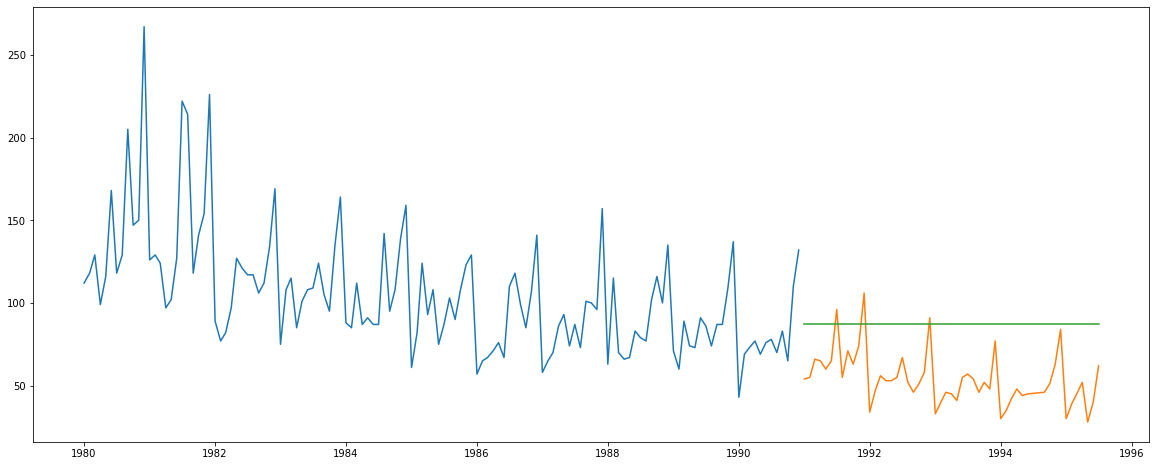

In [74]:
plt.figure(figsize=(20,8))
plt.plot(train['Rose'],label='Train')
plt.plot(test['Rose'],label='Test')

plt.plot(SES_test['Predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['Predict', 0.075], label='Alpha =0.075 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Forecast - Simple Exponrntial Smoothing')
plt.grid();

In [75]:
result_df_6_1 = pd.DataFrame({'Test RMSE': [result_df_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.075,SimpleExponentialSmoothing'])

result_df = pd.concat([result_df, result_df_6_1])
result_df

,Test RMSE
LR_Model,71.596828
Naive_Model,79.718773
Simple Average,15.759783
2pointTrailingMovingAverage,10.402622
4pointTrailingMovingAverage,13.176123
6pointTrailingMovingAverage,13.299874
8pointTrailingMovingAverage,13.997297
"Alpha=0.098, Simple Exp. Smoothing",36.796242
"Alpha=0.075,SimpleExponentialSmoothing",36.432370


In [76]:
# Method 6: Double Exponential Smoothing (Holt's Model)
DES_train = train.copy()
DES_test = test.copy()

In [77]:
from statsmodels.tsa.api import Holt

In [78]:
DES_model = Holt(DES_train['Rose'])

In [79]:
DES_model_autofit = DES_model.fit(optimized=True)

In [80]:
DES_model_autofit.params

{'smoothing_level': 1.4903109413942238e-08,
 'smoothing_trend': 3.0715523798138926e-18,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81555273182406,
 'initial_trend': -0.49437822071047205,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
DES_test['Predict'] =DES_model_autofit.forecast(steps=len(test))
DES_test.head()

,Rose,Predict
YearMonth,,
1991-01-01,54.0,72.063249
1991-02-01,55.0,71.568871
1991-03-01,66.0,71.074493
1991-04-01,65.0,70.580115
1991-05-01,60.0,70.085736


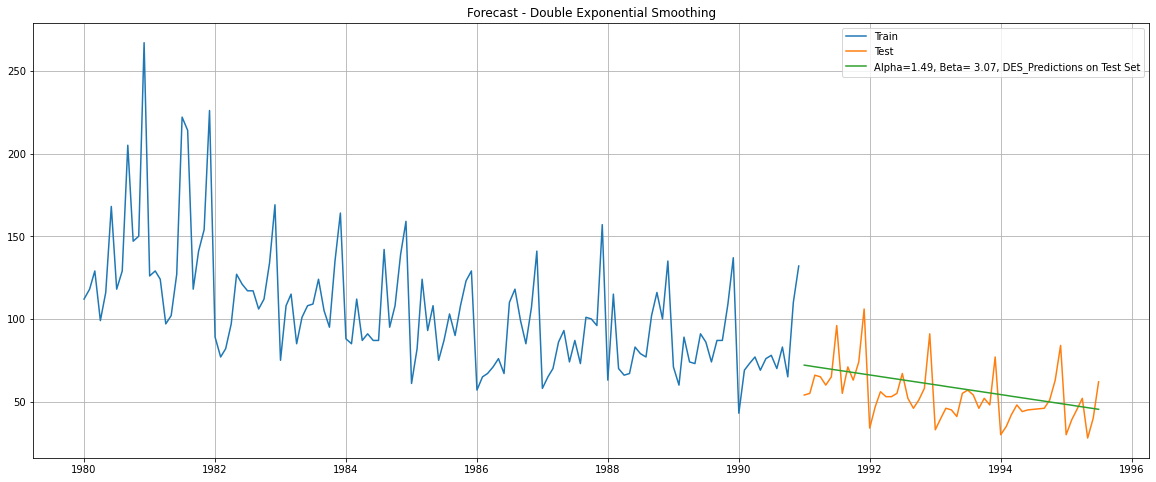

In [82]:
plt.figure(figsize=(20,8))
plt.plot(train['Rose'],label='Train')
plt.plot(test['Rose'],label='Test')

plt.plot(DES_test['Predict'],label='Alpha=1.49, Beta= 3.07, DES_Predictions on Test Set')

plt.legend(loc='best')
plt.title('Forecast - Double Exponential Smoothing')
plt.grid();

In [83]:
rmse_DES_auto = metrics.mean_squared_error(DES_test['Rose'],DES_test['Predict'],squared=False)
print('For Alpha=1.49, Beta= 3.07, Double Exponential Smoothing Model forecast on the Test Data, RMSE is {:1.2f}'.format(rmse_DES_auto))

For Alpha=1.49, Beta= 3.07, Double Exponential Smoothing Model forecast on the Test Data, RMSE is 15.27


In [84]:
result_df_7 = pd.DataFrame({'Test RMSE': [rmse_DES_auto]},index=['Alpha=1.49, Beta= 3.07, Double Exp. Smoothing'])
result_df = pd.concat([result_df,result_df_7])
result_df

,Test RMSE
LR_Model,71.596828
Naive_Model,79.718773
Simple Average,15.759783
2pointTrailingMovingAverage,10.402622
4pointTrailingMovingAverage,13.176123
6pointTrailingMovingAverage,13.299874
8pointTrailingMovingAverage,13.997297
"Alpha=0.098, Simple Exp. Smoothing",36.796242
"Alpha=0.075,SimpleExponentialSmoothing",36.432370
"Alpha=1.49, Beta= 3.07, Double Exp. Smoothing",15.268947


In [85]:
# Now, lets set different Alpha values
result_df_8 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})

In [86]:
for i in np.arange(1,5,0.1):
    for j in np.arange(1,5,0.1):
        model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['Predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['Predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_DES_train_i = metrics.mean_squared_error(DES_train['Rose'],DES_train['Predict',i,j],squared=False)
        
        rmse_DES_test_i = metrics.mean_squared_error(DES_test['Rose'],DES_test['Predict',i,j],squared=False)
        
        result_df_8 = result_df_8.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train_i
                                          ,'Test RMSE':rmse_DES_test_i}, ignore_index=True)

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\numpy\core\_methods.py:160: R

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=

C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slo

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=

C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i

C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slo

C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=

C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=

C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=

C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=

C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=

C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slo

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=

<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope''

C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<ipython-input-86-897f0bed972f>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = DES_model.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1406: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\91866\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=

In [87]:
# Model Evaluation
result_df_8.sort_values(by=['Test RMSE'], ascending=True)

,Alpha Values,Train RMSE,Test RMSE,Beta Values
4,1.0,8.238421e+01,84.295759,1.4
82,1.2,1.413002e+02,87.263449,1.2
80,1.2,8.788508e+01,108.845622,1.0
42,1.1,8.565191e+01,111.488332,1.2
41,1.1,7.824493e+01,190.443977,1.1
...,...,...,...,...
1223,4.0,inf,inf,3.3
1222,4.0,inf,inf,3.2
1221,4.0,1.951212e+152,inf,3.1
1199,3.9,inf,inf,4.9


KeyError: ('Predict', 0.1, 0.1)

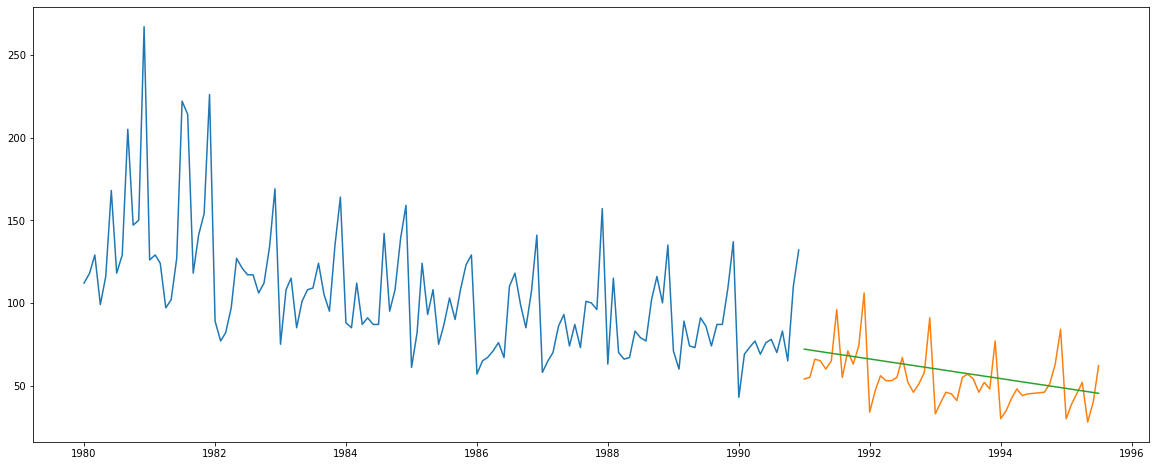

In [88]:
plt.figure(figsize=(20,8))
plt.plot(train['Rose'],label='Train')
plt.plot(test['Rose'],label='Test')

plt.plot(DES_test['Predict'],label='Alpha=1.49, Beta= 3.07, DES_Predictions on Test Set')

plt.plot(DES_test['Predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Forecast - Double Exponrntial Smoothing')
plt.grid();

In [89]:
result_df_8_1 = pd.DataFrame({'Test RMSE': [result_df_8.sort_values(by=['Test RMSE']).values[0][2]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

result_df = pd.concat([result_df, result_df_8_1])
result_df

,Test RMSE
LR_Model,71.596828
Naive_Model,79.718773
Simple Average,15.759783
2pointTrailingMovingAverage,10.402622
4pointTrailingMovingAverage,13.176123
6pointTrailingMovingAverage,13.299874
8pointTrailingMovingAverage,13.997297
"Alpha=0.098, Simple Exp. Smoothing",36.796242
"Alpha=0.075,SimpleExponentialSmoothing",36.432370
"Alpha=1.49, Beta= 3.07, Double Exp. Smoothing",15.268947


In [90]:
# Method 7: Triple Exponential Smoothing Model
TES_train = train.copy()
TES_test = test.copy()

In [91]:
from statsmodels.tsa.api import ExponentialSmoothing

In [167]:
TES_model = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='Multiplicative')

In [168]:
TES_model_autofit = TES_model.fit(optimized=True)

In [169]:
TES_model.params

{'smoothing_level': 0.0701751918792642,
 'smoothing_trend': 0.04721466379144656,
 'smoothing_seasonal': 0.000699296621812994,
 'damping_trend': nan,
 'initial_level': 128.23438360348575,
 'initial_trend': -0.7731705037001518,
 'initial_seasons': array([0.87721976, 0.99489017, 1.08724565, 0.95079807, 1.06887845,
        1.16449983, 1.28046271, 1.36279018, 1.29019938, 1.26347863,
        1.47262344, 2.03090295]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [170]:
## Prediction on the test data

TES_test['Predict'] = TES_model_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,Predict,"(Predict, 0.1, 0.1, 0.1)","(Predict, 0.1, 0.1, 0.2)","(Predict, 0.1, 0.1, 0.30000000000000004)","(Predict, 0.1, 0.1, 0.4)","(Predict, 0.1, 0.1, 0.5)","(Predict, 0.1, 0.1, 0.6)","(Predict, 0.1, 0.1, 0.7000000000000001)","(Predict, 0.1, 0.1, 0.8)",...,"(Predict, 0.9, 0.8, 0.9)","(Predict, 0.9, 0.9, 0.1)","(Predict, 0.9, 0.9, 0.2)","(Predict, 0.9, 0.9, 0.30000000000000004)","(Predict, 0.9, 0.9, 0.4)","(Predict, 0.9, 0.9, 0.5)","(Predict, 0.9, 0.9, 0.6)","(Predict, 0.9, 0.9, 0.7000000000000001)","(Predict, 0.9, 0.9, 0.8)","(Predict, 0.9, 0.9, 0.9)"
YearMonth,,,,,,,,,,,,,,,,,,,,,
1991-01-01,54.0,56.411071,54.539815,52.068654,50.576252,49.487204,48.433031,47.189604,45.644878,43.774465,...,-56.937486,58.830691,-3.011534,-54.240673,27.587410,31.292049,29.895736,-19.667751,-4.668766,66.524903
1991-02-01,55.0,63.801331,63.750857,64.597764,64.994154,65.108834,65.031348,64.818418,64.559584,64.420678,...,-107.374392,79.472649,-12.039128,9.932722,-20.056079,37.035976,-25.040491,87.978182,-6.200564,-12.114064
1991-03-01,66.0,69.500435,68.670042,68.524333,68.446758,68.707100,69.292851,69.976008,70.441630,70.393159,...,104.774276,79.769277,-39.796202,55.941256,-15.843568,14.497152,13.824777,-16.853223,52.719643,31.694405
1991-04-01,65.0,60.599603,61.295063,63.594391,65.122271,66.310311,67.480643,68.765318,70.135657,71.456678,...,-934.816884,69.851961,-65.149783,334.543092,-1307.211363,-530.257830,38.327043,44.405366,582.082792,34.538436
1991-05-01,60.0,67.889542,65.953079,65.280260,64.604999,64.041810,63.733080,63.736109,64.009263,64.432122,...,-427.556599,69.067335,-97.702128,-424.475552,-6.904582,18.810820,140.153242,-3.759158,-86.699281,-46.533908


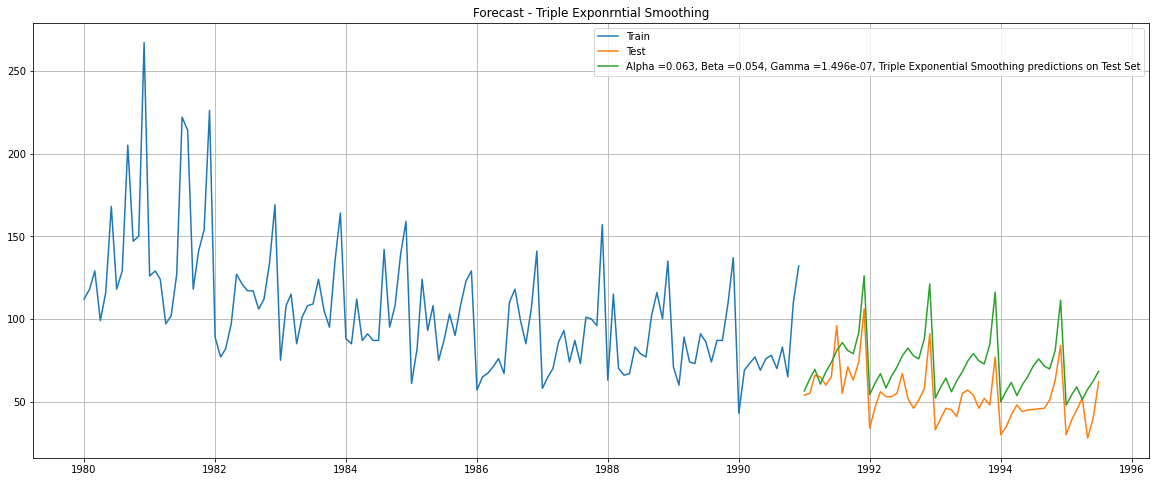

In [171]:
plt.figure(figsize=(20,8))
plt.plot(train['Rose'],label='Train')
plt.plot(test['Rose'],label='Test')

plt.plot(TES_test['Predict'], label='Alpha =0.063, Beta =0.054, Gamma =1.496e-07, Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Forecast - Triple Exponrntial Smoothing')
plt.grid();

In [172]:
rmse_TES_auto = metrics.mean_squared_error(TES_test['Rose'],TES_test['Predict'],squared=False)
print('For Alpha =0.063, Beta =0.054, Gamma =1.496e-07, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is {:1.2f}'.format(rmse_TES_auto))

For Alpha =0.063, Beta =0.054, Gamma =1.496e-07, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 20.37


In [98]:
result_df_9 = pd.DataFrame({'Test RMSE': [rmse_TES_auto]},index=['Alpha =0.063, Beta =0.054, Gamma =1.496e-07, Triple Exp. Smoothing'])
result_df = pd.concat([result_df,result_df_9])
result_df

,Test RMSE
LR_Model,71.596828
Naive_Model,79.718773
Simple Average,15.759783
2pointTrailingMovingAverage,10.402622
4pointTrailingMovingAverage,13.176123
6pointTrailingMovingAverage,13.299874
8pointTrailingMovingAverage,13.997297
"Alpha=0.098, Simple Exp. Smoothing",36.796242
"Alpha=0.075,SimpleExponentialSmoothing",36.432370
"Alpha=1.49, Beta= 3.07, Double Exp. Smoothing",15.268947


In [99]:
## First we will define an empty dataframe to store our values from the loop

result_df_10 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
result_df_10

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [100]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['Predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['Predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_TES_train_i = metrics.mean_squared_error(TES_train['Rose'],TES_train['Predict',i,j,k],squared=False)
            
            rmse_TES_test_i = metrics.mean_squared_error(TES_test['Rose'],TES_test['Predict',i,j,k],squared=False)
            
            result_df_10 = result_df_10.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_TES_train_i,'Test RMSE':rmse_TES_test_i}
                                                 , ignore_index=True)

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-100-1b87ed8c1233>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = TES_model.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

In [101]:
result_df_10.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
9,0.1,0.2,0.1,19.770392,9.223504
10,0.1,0.2,0.2,20.253487,9.496152
127,0.2,0.6,0.2,23.129850,9.565988
11,0.1,0.2,0.3,20.871304,9.888106
119,0.2,0.5,0.3,23.656276,9.891550


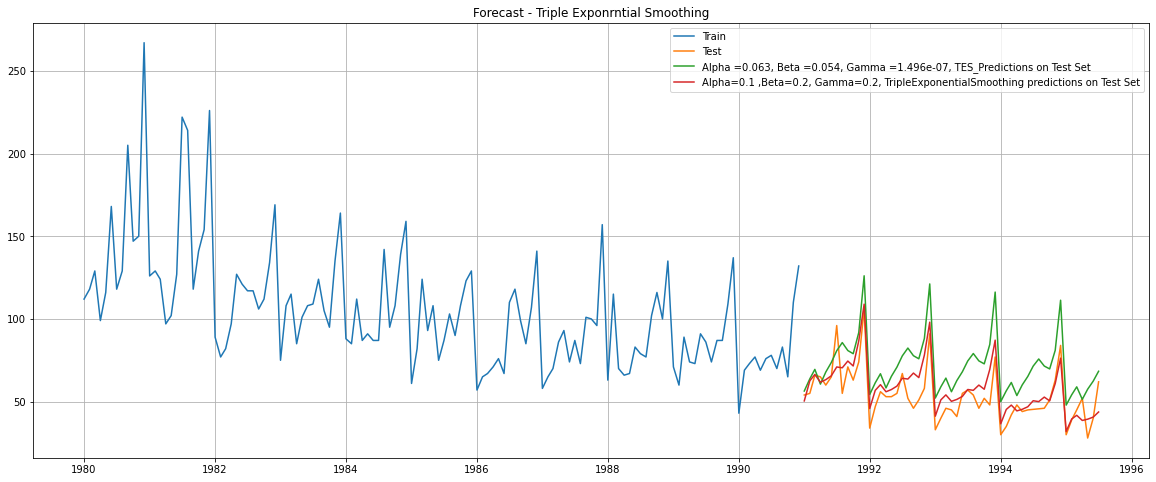

In [102]:
plt.figure(figsize=(20,8))
plt.plot(train['Rose'],label='Train')
plt.plot(test['Rose'],label='Test')

plt.plot(TES_test['Predict'],label='Alpha =0.063, Beta =0.054, Gamma =1.496e-07, TES_Predictions on Test Set')

plt.plot(TES_test['Predict', 0.1, 0.2, 0.2], label='Alpha=0.1 ,Beta=0.2, Gamma=0.2, TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Forecast - Triple Exponrntial Smoothing')
plt.grid();

In [103]:
result_df_10_1 = pd.DataFrame({'Test RMSE': [result_df_10.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1 ,Beta=0.2, Gamma=0.2, TripleExponentialSmoothing'])

result_df = pd.concat([result_df, result_df_10_1])
result_df

,Test RMSE
LR_Model,71.596828
Naive_Model,79.718773
Simple Average,15.759783
2pointTrailingMovingAverage,10.402622
4pointTrailingMovingAverage,13.176123
6pointTrailingMovingAverage,13.299874
8pointTrailingMovingAverage,13.997297
"Alpha=0.098, Simple Exp. Smoothing",36.796242
"Alpha=0.075,SimpleExponentialSmoothing",36.432370
"Alpha=1.49, Beta= 3.07, Double Exp. Smoothing",15.268947


In [104]:
result_df.sort_values(by='Test RMSE')

,Test RMSE
"Alpha=0.1 ,Beta=0.2, Gamma=0.2, TripleExponentialSmoothing",9.223504
2pointTrailingMovingAverage,10.402622
4pointTrailingMovingAverage,13.176123
6pointTrailingMovingAverage,13.299874
8pointTrailingMovingAverage,13.997297
"Alpha=1.49, Beta= 3.07, Double Exp. Smoothing",15.268947
Simple Average,15.759783
"Alpha =0.063, Beta =0.054, Gamma =1.496e-07, Triple Exp. Smoothing",20.370572
"Alpha=0.075,SimpleExponentialSmoothing",36.432370
"Alpha=0.098, Simple Exp. Smoothing",36.796242


In [105]:
# Check the stationarity of the data - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

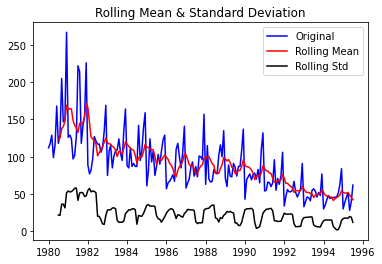

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [106]:
test_stationarity(df['Rose'])

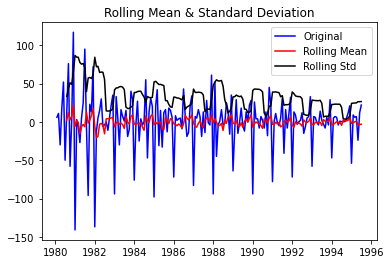

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [107]:
test_stationarity(df['Rose'].diff().dropna())

In [108]:
# Plot the autocorrelartion and partial autocorrelation functions plots on the whole data.

In [109]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [110]:
train_a_sarima = train.copy()
test_a_sarima = test.copy()

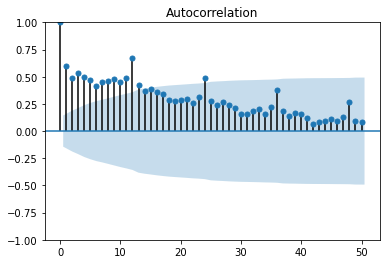

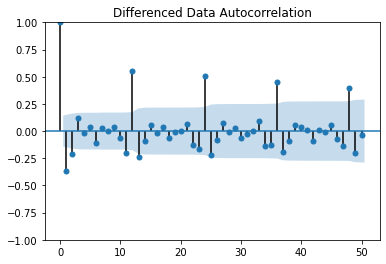

In [111]:
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\91866\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


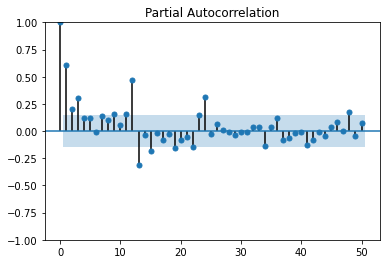

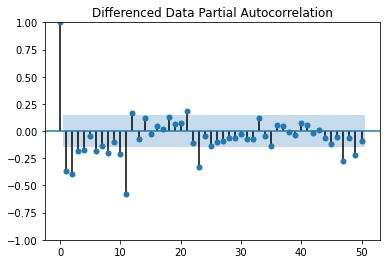

In [112]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

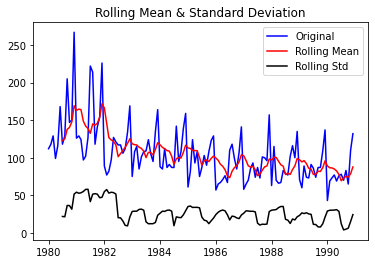

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [113]:
test_stationarity(train_a_sarima['Rose'])

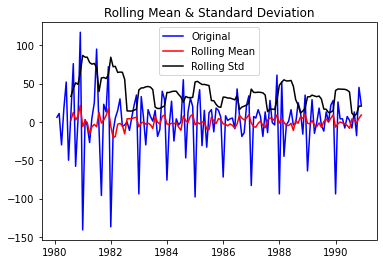

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [114]:
test_stationarity(train_a_sarima['Rose'].diff().dropna())

In [115]:
# Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the 
# lowest Akaike Information Criteria (AIC).

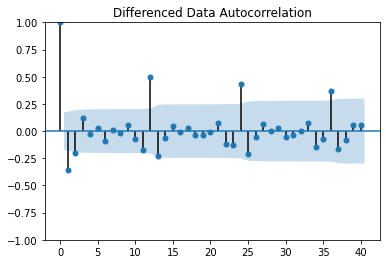

In [116]:
# ACF Value
plot_acf(train_a_sarima['Rose'].diff().dropna(),lags=40,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


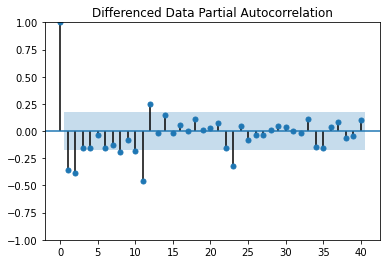

In [117]:
# PACF Value
plot_pacf(train_a_sarima['Rose'].diff().dropna(),lags=40,title='Differenced Data Partial Autocorrelation')
plt.show()

In [118]:
# Built model based upon the pacf and acf graphs
# Will check the results of ARIMA model.

In [119]:
from statsmodels.tsa.arima.model import ARIMA

In [120]:
manual_ARIMA = ARIMA(train_a_sarima['Rose'], order=(2,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 20 Feb 2022   AIC                           1281.871
Time:                        22:16:47   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

In [121]:
from statsmodels.tsa.arima_model import ARIMAResults

In [122]:
predicted_manual_ARIMA = results_manual_ARIMA.get_forecast(steps=len(test_a_sarima))

In [123]:
from sklearn.metrics import  mean_squared_error
rmse_ARIMA_manual = mean_squared_error(test_a_sarima['Rose'],predicted_manual_ARIMA.predicted_mean,squared=False)
print('For (2,1,2) ARIMA Manual Model forecast on the Test Data, RMSE is {:1.2f}'.format(rmse_ARIMA_manual))

For (2,1,2) ARIMA Manual Model forecast on the Test Data, RMSE is 36.87


In [124]:
result_df_11_1 = pd.DataFrame({'Test RMSE': [rmse_ARIMA_manual]},index=['(2,1,2) ARIMA Manual Model'])
result_df = pd.concat([result_df,result_df_11_1])
result_df

,Test RMSE
LR_Model,71.596828
Naive_Model,79.718773
Simple Average,15.759783
2pointTrailingMovingAverage,10.402622
4pointTrailingMovingAverage,13.176123
6pointTrailingMovingAverage,13.299874
8pointTrailingMovingAverage,13.997297
"Alpha=0.098, Simple Exp. Smoothing",36.796242
"Alpha=0.075,SimpleExponentialSmoothing",36.432370
"Alpha=1.49, Beta= 3.07, Double Exp. Smoothing",15.268947


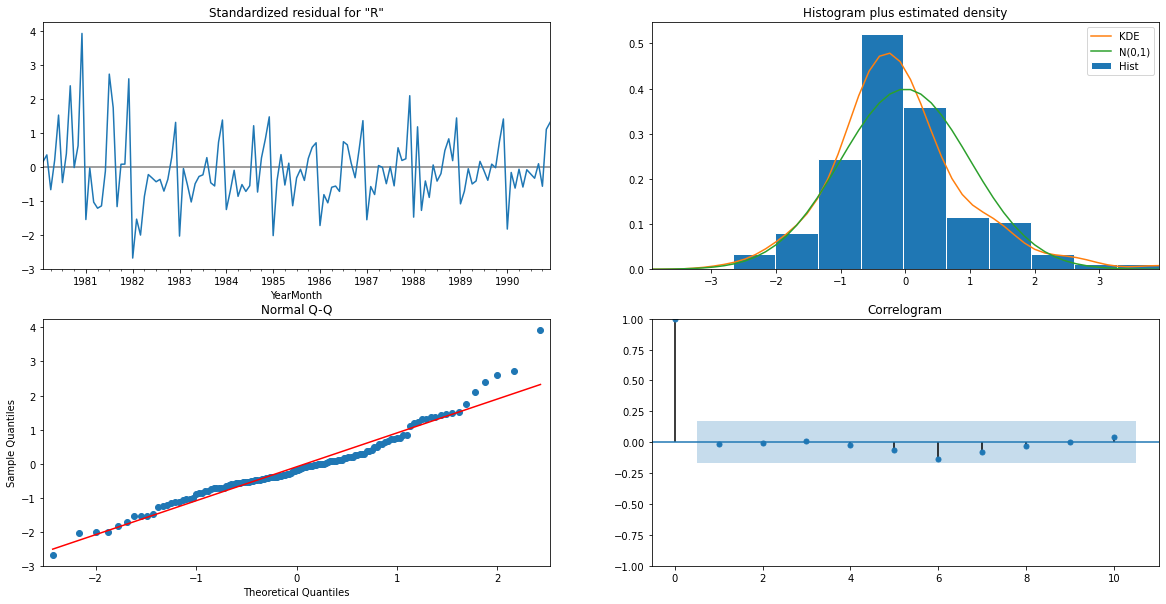

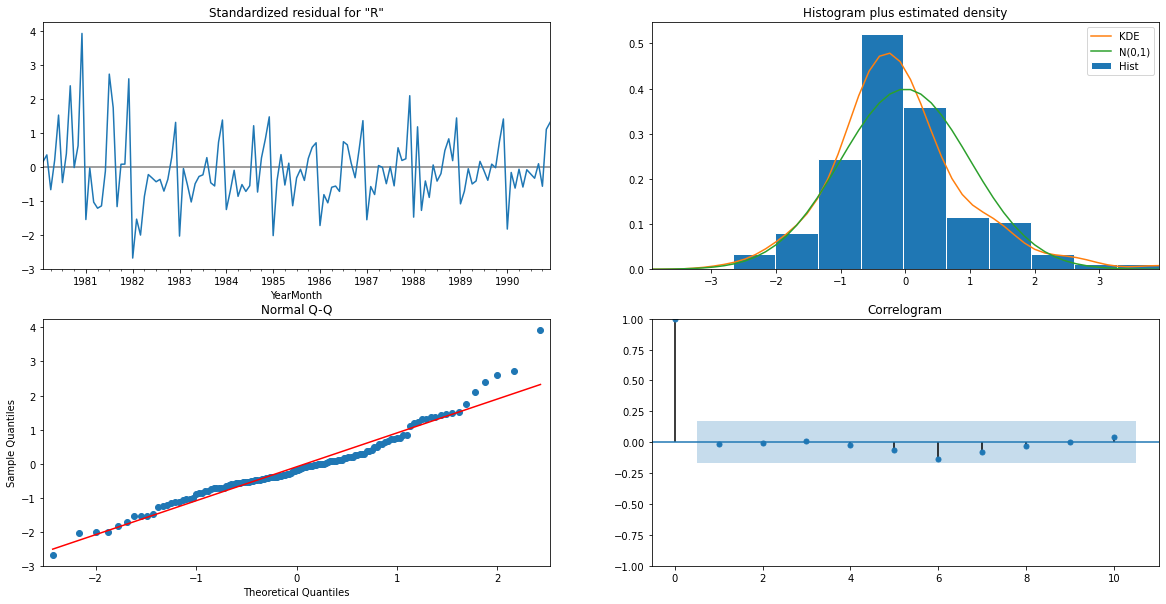

In [159]:
results_manual_ARIMA.plot_diagnostics(figsize=(20,10))

In [125]:
# Built ARIMA model based upon iteration

In [126]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [127]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [128]:
for param in pdq:
    ARIMA_model = ARIMA(train_a_sarima['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748306
ARIMA(0, 1, 2) - AIC:1279.671528853577
ARIMA(1, 1, 0) - AIC:1317.350310538146
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.870723423192
ARIMA(2, 1, 0) - AIC:1298.6110341604885
ARIMA(2, 1, 1) - AIC:1281.5078621868524
ARIMA(2, 1, 2) - AIC:1281.8707222264397


In [129]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722
1,"(0, 1, 1)",1282.309832
6,"(2, 1, 0)",1298.611034
3,"(1, 1, 0)",1317.350311
0,"(0, 1, 0)",1333.154673


In [130]:
iter_ARIMA = ARIMA(train_a_sarima['Rose'], order=(0,1,2),freq='MS')

results_iter_ARIMA = iter_ARIMA.fit()

print(results_iter_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 20 Feb 2022   AIC                           1279.672
Time:                        22:16:48   BIC                           1288.297
Sample:                    01-01-1980   HQIC                          1283.176
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

In [131]:
predicted_iter_ARIMA = results_iter_ARIMA.get_forecast(steps=len(test_a_sarima))

In [132]:
from sklearn.metrics import  mean_squared_error
rmse_ARIMA_iter = mean_squared_error(test_a_sarima['Rose'],predicted_iter_ARIMA.predicted_mean,squared=False)
print('For (0,1,2) ARIMA Manual Model forecast on the Test Data, RMSE is {:1.2f}'.format(rmse_ARIMA_iter))

For (0,1,2) ARIMA Manual Model forecast on the Test Data, RMSE is 37.31


In [133]:
result_df_11_2 = pd.DataFrame({'Test RMSE': [rmse_ARIMA_iter]},index=['(0,1,2) ARIMA Manual Model'])
result_df = pd.concat([result_df,result_df_11_2])
result_df

,Test RMSE
LR_Model,71.596828
Naive_Model,79.718773
Simple Average,15.759783
2pointTrailingMovingAverage,10.402622
4pointTrailingMovingAverage,13.176123
6pointTrailingMovingAverage,13.299874
8pointTrailingMovingAverage,13.997297
"Alpha=0.098, Simple Exp. Smoothing",36.796242
"Alpha=0.075,SimpleExponentialSmoothing",36.432370
"Alpha=1.49, Beta= 3.07, Double Exp. Smoothing",15.268947


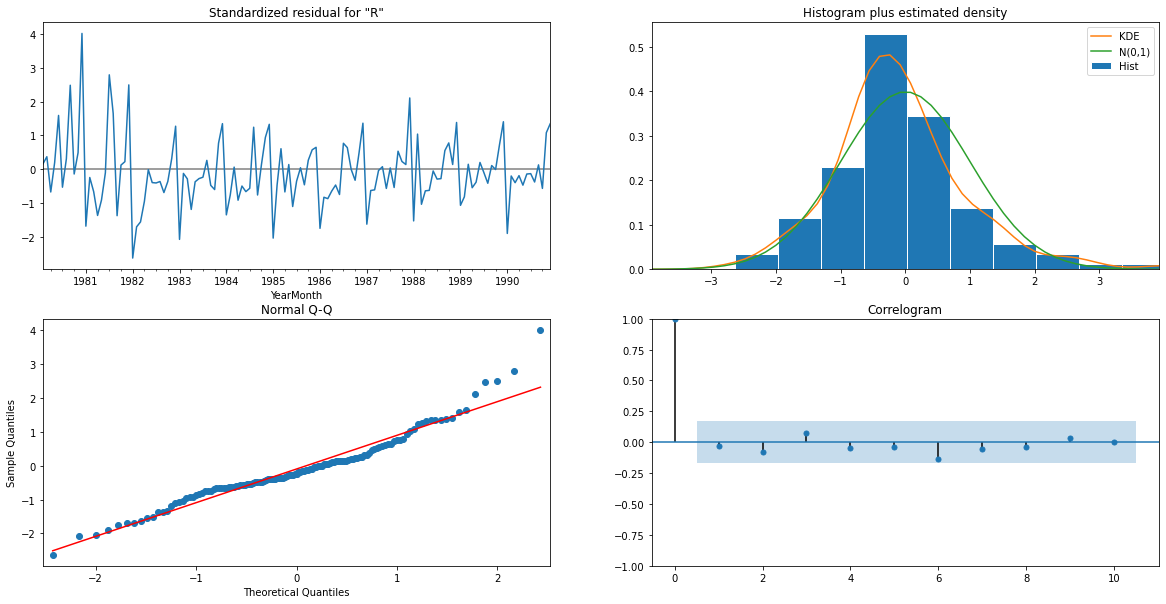

In [158]:
results_iter_ARIMA.plot_diagnostics(figsize=(20,10))
plt.show()

In [134]:
# Built model based upon the pacf and acf graphs
# Setting the seasonality as 12 for the first iteration of the auto SARIMA model.
from statsmodels.compat.numpy import NP_LT_123
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train_a_sarima['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, [], 12)   Log Likelihood                -390.390
Date:                             Sun, 20 Feb 2022   AIC                            794.780
Time:                                     22:16:50   BIC                            812.508
Sample:                                          0   HQIC                           801.938
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2172      2.170     -0.100      0.920      -4.470       4.036
ar.L2          0.0743      

In [135]:
predicted_manual_SARIMA = results_manual_SARIMA_12.get_forecast(steps=len(test_a_sarima))

In [136]:
rmse_SARIMA_manual = metrics.mean_squared_error(test_a_sarima['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
print('For (2,1,2)(2,1,0,12) SARIMA Manual Model forecast on the Test Data, RMSE is {:1.2f}'.format(rmse_SARIMA_manual))

For (2,1,2)(2,1,0,12) SARIMA Manual Model forecast on the Test Data, RMSE is 17.91


In [137]:
result_df_11_3 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_manual]},index=['(2,1,2)(2,1,0,12) SARIMA Manual Model'])
result_df = pd.concat([result_df,result_df_11_3])
result_df

,Test RMSE
LR_Model,71.596828
Naive_Model,79.718773
Simple Average,15.759783
2pointTrailingMovingAverage,10.402622
4pointTrailingMovingAverage,13.176123
6pointTrailingMovingAverage,13.299874
8pointTrailingMovingAverage,13.997297
"Alpha=0.098, Simple Exp. Smoothing",36.796242
"Alpha=0.075,SimpleExponentialSmoothing",36.432370
"Alpha=1.49, Beta= 3.07, Double Exp. Smoothing",15.268947


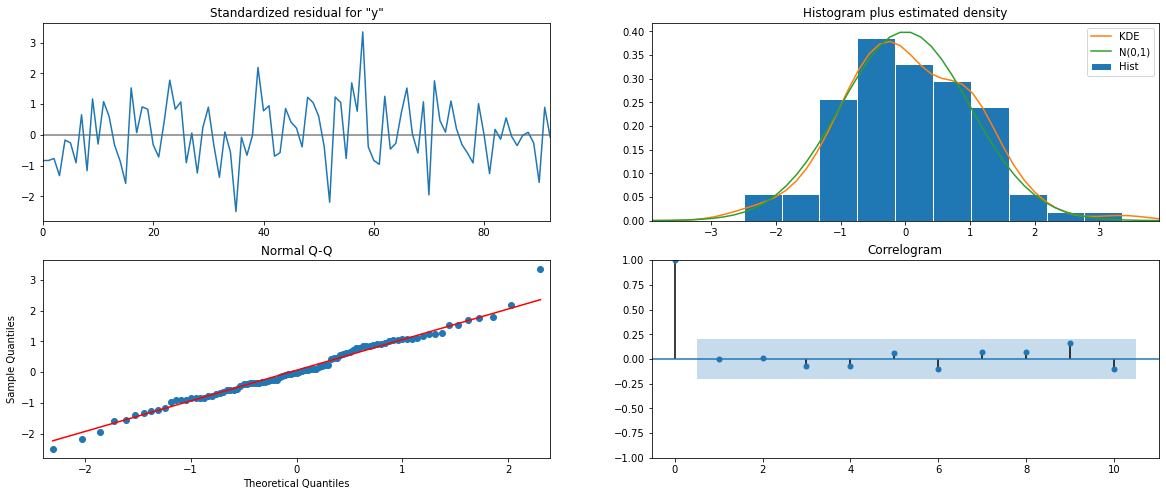

In [138]:
results_manual_SARIMA_12.plot_diagnostics(figsize=(20,8))
plt.show()

In [139]:
# Built model based upon the iterations graphs
import itertools
p = range(0, 3)
q = range(0, 3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [140]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [141]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.5057301633294
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.8687014776165
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:982.3269589658804
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:975.3375383601601
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.7332182654507
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:858.5132698374409
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:853.3390729143637
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:842.6282244225811
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1113.7663133562694
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:915.073060671788
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:790.903280926706
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:944.2456655530685
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:929.3362488520131
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:792.7161670340598
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:810.3194350158651
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:804.1555762127397
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:782.1538715145269
SARIMA(0, 1, 2)x(0, 1, 0, 12

In [142]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 1, 2, 12)",774.969119
53,"(1, 1, 2)","(2, 1, 2, 12)",776.940109
80,"(2, 1, 2)","(2, 1, 2, 12)",776.996101
17,"(0, 1, 1)","(2, 1, 2, 12)",782.153872
79,"(2, 1, 2)","(2, 1, 1, 12)",783.703652


In [143]:
iter_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
iter_results_SARIMA_12 = iter_SARIMA_12.fit(maxiter=1000)
print(iter_results_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Sun, 20 Feb 2022   AIC                            774.969
Time:                                    22:17:51   BIC                            792.622
Sample:                                         0   HQIC                           782.094
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.166      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

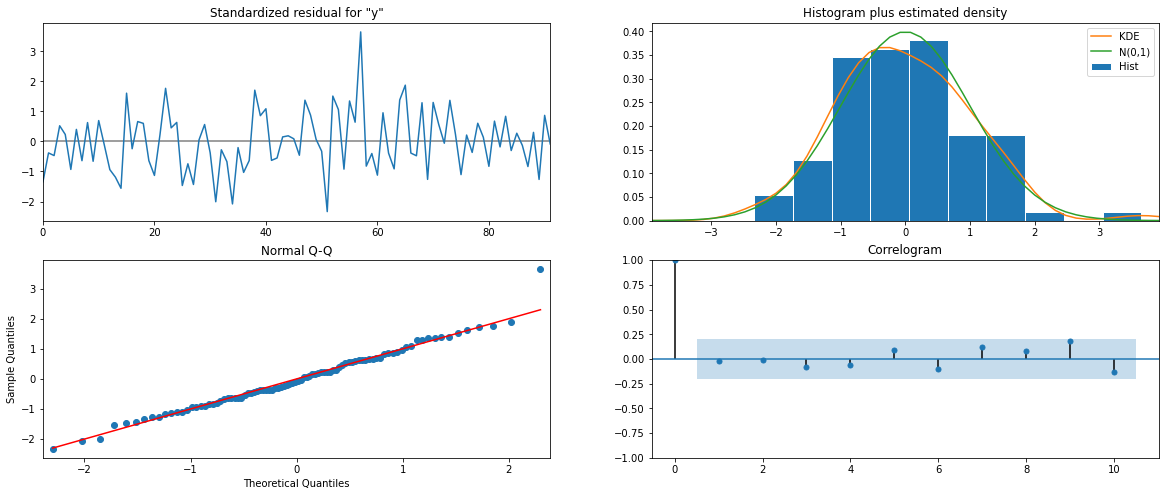

In [144]:
iter_results_SARIMA_12.plot_diagnostics(figsize=(20,8))
plt.show()

In [145]:
predicted_iter_SARIMA = iter_results_SARIMA_12.get_forecast(steps=len(test_a_sarima))

In [146]:
rmse_SARIMA_iter = metrics.mean_squared_error(test_a_sarima['Rose'],predicted_iter_SARIMA.predicted_mean,squared=False)
print('For (0, 1, 2)(2, 1, 2, 12) , SARIMA iteration Model forecast on the Test Data, RMSE is {:1.2f}'.format(rmse_SARIMA_iter))

For (0, 1, 2)(2, 1, 2, 12) , SARIMA iteration Model forecast on the Test Data, RMSE is 16.50


In [147]:
result_df_12 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_iter]},index=['(0, 1, 2)(2, 1, 2, 12) , SARIMA iteration Model'])
result_df = pd.concat([result_df,result_df_12])
result_df

,Test RMSE
LR_Model,71.596828
Naive_Model,79.718773
Simple Average,15.759783
2pointTrailingMovingAverage,10.402622
4pointTrailingMovingAverage,13.176123
6pointTrailingMovingAverage,13.299874
8pointTrailingMovingAverage,13.997297
"Alpha=0.098, Simple Exp. Smoothing",36.796242
"Alpha=0.075,SimpleExponentialSmoothing",36.432370
"Alpha=1.49, Beta= 3.07, Double Exp. Smoothing",15.268947


In [148]:
result_df

,Test RMSE
LR_Model,71.596828
Naive_Model,79.718773
Simple Average,15.759783
2pointTrailingMovingAverage,10.402622
4pointTrailingMovingAverage,13.176123
6pointTrailingMovingAverage,13.299874
8pointTrailingMovingAverage,13.997297
"Alpha=0.098, Simple Exp. Smoothing",36.796242
"Alpha=0.075,SimpleExponentialSmoothing",36.432370
"Alpha=1.49, Beta= 3.07, Double Exp. Smoothing",15.268947


In [149]:
# Building the most optimum model on the Full Data.

In [150]:
result_df.sort_values(by='Test RMSE')

,Test RMSE
"Alpha=0.1 ,Beta=0.2, Gamma=0.2, TripleExponentialSmoothing",9.223504
2pointTrailingMovingAverage,10.402622
4pointTrailingMovingAverage,13.176123
6pointTrailingMovingAverage,13.299874
8pointTrailingMovingAverage,13.997297
"Alpha=1.49, Beta= 3.07, Double Exp. Smoothing",15.268947
Simple Average,15.759783
"(0, 1, 2)(2, 1, 2, 12) , SARIMA iteration Model",16.500245
"(2,1,2)(2,1,0,12) SARIMA Manual Model",17.914615
"Alpha =0.063, Beta =0.054, Gamma =1.496e-07, Triple Exp. Smoothing",20.370572


In [151]:
# Therefore, we go for Triple Exponential Smoothing Model as optimum model.
fullmodel_TES = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_slope=0.2,
                                                                 smoothing_seasonal=0.2)

<ipython-input-151-502e68b32683>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fullmodel_TES = ExponentialSmoothing(df,


In [152]:
RMSE_fullmodel_TES = metrics.mean_squared_error(df['Rose'],fullmodel_TES.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel_TES)

RMSE: 17.40436227345529


In [153]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction = fullmodel_TES.forecast(steps=12)
prediction

1995-08-01    47.607992
1995-09-01    48.284484
1995-10-01    50.279657
1995-11-01    58.461229
1995-12-01    82.116597
1996-01-01    31.696348
1996-02-01    39.431810
1996-03-01    45.360026
1996-04-01    46.803005
1996-05-01    40.722234
1996-06-01    46.994555
1996-07-01    54.041101
Freq: MS, dtype: float64

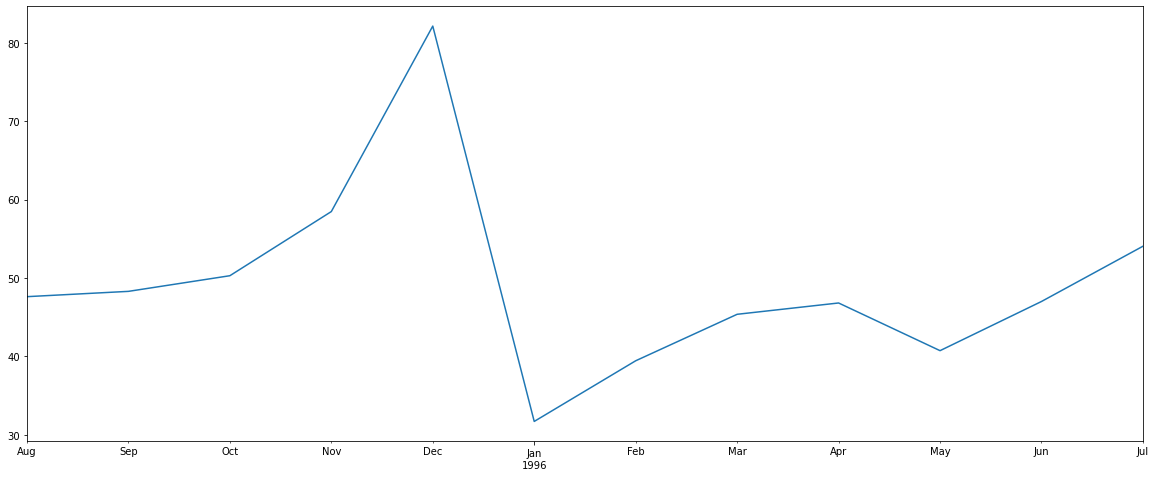

In [154]:
prediction.plot(figsize=(20,8));

In [155]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(fullmodel_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(fullmodel_TES.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,13.422361,47.607992,81.793624
1995-09-01,14.098853,48.284484,82.470115
1995-10-01,16.094026,50.279657,84.465288
1995-11-01,24.275597,58.461229,92.646860
1995-12-01,47.930965,82.116597,116.302228


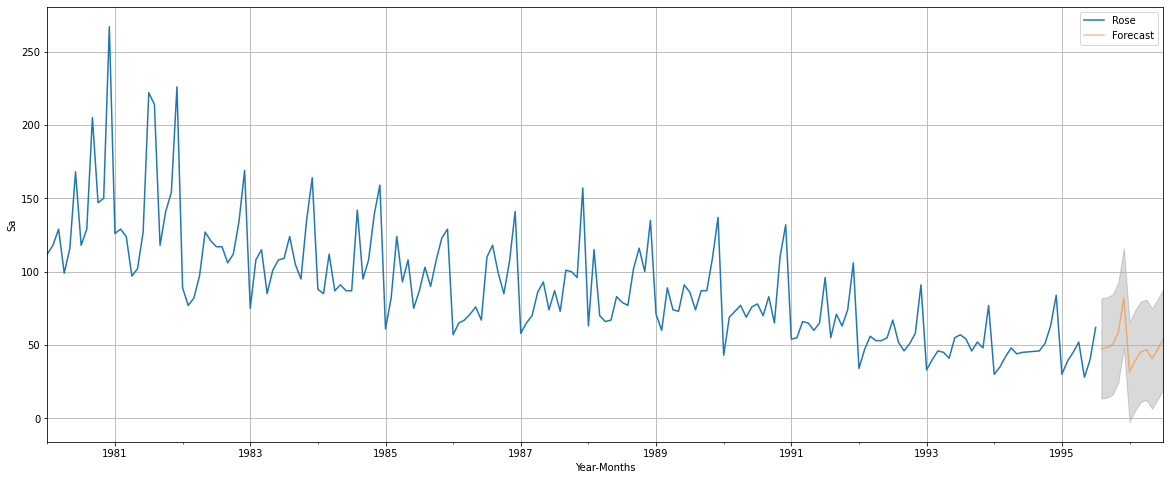

In [156]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(20,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sa')
plt.legend(loc='best')
plt.grid()
plt.show()